## Importamo potrebne dodatke

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Učitamo podatke

In [61]:
# Ucitavanje podataka
regular_season_results = pd.read_csv("dataset/regular_season_results.csv")
sample_submission = pd.read_csv("dataset/sample_submission.csv")
seasons = pd.read_csv("dataset/seasons.csv")
teams = pd.read_csv("dataset/teams.csv")
tourney_results = pd.read_csv("dataset/tourney_results.csv")
tourney_seeds = pd.read_csv("dataset/tourney_seeds.csv")
tourney_slots = pd.read_csv("dataset/tourney_slots.csv")



## Kratki opis podataka

### teams.csv
Identificira 356 različitih fakultetskih timova.
Jedini koji zapravo sadrži imena timova.
- "id" - identifikator određenog tima, brojevi od 501 do 855 da slučajno nebi bili zamjenjeni rezultatima i da svaki tim ima po tri znamenke identifikacije
- "name" - naziv tima

### seasons.csv
Identificira 18 različitih sezona.
- "season" - alfabetski označava sezonu, gdje prva sezona počinje sa slovom A, a završava slovom R
- "years" - označava u kojem godišnjem razdoblju je trajala sezona
- "dayzero" - označava datum početka sezone
- "regionW/X/Y/Z" - uvijek postoje 4 finalne regije, ako regija dođe prva alfabetski onda je onda regija W, koja regija igra polufinale protiv regije W ona je regija X. Za ostale dvije regije koja prva alfabetski dođe je regija Y, a zadnja je regija Z.

### regular_season_results.csv
Sadrži sve rezultate u sezoni za 18 sezona
- "season" - identifikacijsko slovo za sezonu
- "daynum" - dan na koji je odigrana ta utakmica, relativno na pocetni dan sezone "dayzero"
- "wteam" - id pobjedničkog tima
- "wscore" - rezultat pobjedničkog tima
- "lteam" - id gubitničkog tima
- "lscore" - rezultat gubitničkog tima
- "numot" - broj prekovremenih perioda
- "wloc" - lokacija pobjedničkog tima, "H" ako je pobjednički tim doma, "A" ako je u posjeti, "N" ako je lokacija neutralna

### tourney_results.csv
Prikazuje NCAA rezultate turnira, formatiran kao "regular_seasons_results", samo bez stupca wloc jer je teren uvijek neutralan.

### tourney_seeds.csv
Finalnih 64 tima u svakom NCAA turniru, za svih 18 sezona.
- "season" - identifikacijsko slovo za sezonu
- "seed" - označava tri znaka gdje prvo ide regija W, X, Y, Z, a ostala dvije znamenke označavaju poziciju tima u regiji.
- "team" - identifikacijski broj tima

### tourney_slots.csv
- "season" - identifikacijsko slovo za sezonu
- "slot", "strongseed", "weakseed"  - detaljnije objašnjeni  na linku*

*detaljnije o svakoj značajci na linku https://www.kaggle.com/competitions/march-machine-learning-mania-2014/data

In [62]:
# Uvid o podacima regularne sezone
regular_season_results


,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,A,16,511,91,647,57,H,NaN
1,A,16,515,75,812,67,H,NaN
2,A,16,606,87,658,67,H,NaN
3,A,16,670,73,573,65,H,NaN
4,A,16,721,99,632,68,H,NaN
...,...,...,...,...,...,...,...,...
91219,S,132,592,61,640,60,N,0.0
91220,S,132,671,69,670,55,N,0.0
91221,S,132,779,65,825,61,N,0.0
91222,S,132,811,82,605,81,N,1.0


In [63]:
# Uvid o podacima playoffa
tourney_results

,season,daynum,wteam,wscore,lteam,lscore,numot
0,A,136,515,86,729,80,NaN
1,A,136,559,68,555,59,NaN
2,A,136,576,75,666,63,NaN
3,A,136,581,75,577,60,NaN
4,A,136,604,81,551,74,NaN
...,...,...,...,...,...,...,...
1151,R,146,651,85,577,63,0.0
1152,R,146,670,79,592,59,0.0
1153,R,152,651,72,846,68,0.0
1154,R,152,670,61,786,56,0.0


In [64]:
tourney_seeds

,season,seed,team
0,A,W01,663
1,A,W02,603
2,A,W03,796
3,A,W04,660
4,A,W05,729
...,...,...,...
1237,S,Z12,689
1238,S,Z13,702
1239,S,Z14,811
1240,S,Z15,509


In [65]:
tourney_slots

,season,slot,strongseed,weakseed
0,A,R1W1,W01,W16
1,A,R1W2,W02,W15
2,A,R1W3,W03,W14
3,A,R1W4,W04,W13
4,A,R1W5,W05,W12
...,...,...,...,...
1218,S,R4Y1,R3Y1,R3Y2
1219,S,R4Z1,R3Z1,R3Z2
1220,S,R5WX,R4W1,R4X1
1221,S,R5YZ,R4Y1,R4Z1


In [66]:
seasons.regionW.value_counts()

East           15
Atlanta         2
Midwest         1
Albuquerque     1
Name: regionW, dtype: int64

In [67]:
seasons.regionX.value_counts()

South        6
Midwest      5
West         4
Southeast    1
Phoenix      1
Chicago      1
Oakland      1
Name: regionX, dtype: int64

In [68]:
seasons.regionY.value_counts()

Midwest           9
South             4
Southeast         2
East              1
EastRutherford    1
Austin            1
Minneapolis       1
Name: regionY, dtype: int64

In [69]:
seasons.regionZ.value_counts()

West            12
South            3
StLouis          1
Syracuse         1
WashingtonDC     1
Southwest        1
Name: regionZ, dtype: int64

In [70]:
regular_season_results.describe()


,daynum,wteam,wscore,lteam,lscore,numot
count,91224.000000,91224.000000,91224.000000,91224.000000,91224.000000,51333.000000
mean,73.410133,680.981058,75.370440,677.047400,63.208860,0.072000
std,34.210997,103.099502,11.408528,102.950054,10.940295,0.313278
min,0.000000,501.000000,34.000000,501.000000,20.000000,0.000000
25%,44.000000,592.000000,68.000000,587.000000,56.000000,0.000000
50%,75.000000,678.000000,75.000000,675.000000,63.000000,0.000000
75%,103.000000,772.000000,83.000000,768.000000,70.000000,0.000000
max,133.000000,856.000000,153.000000,856.000000,140.000000,6.000000


In [71]:
tourney_results.describe()

,daynum,wteam,wscore,lteam,lscore,numot
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,585.000000
mean,139.143599,682.515571,75.549308,686.699827,63.667820,0.075214
std,4.213580,98.684397,10.941410,103.201450,10.567058,0.311565
min,134.000000,504.000000,43.000000,502.000000,29.000000,0.000000
25%,136.000000,606.000000,68.000000,603.750000,57.000000,0.000000
50%,137.000000,671.000000,75.000000,681.500000,63.000000,0.000000
75%,139.000000,783.000000,82.000000,783.000000,70.000000,0.000000
max,154.000000,853.000000,121.000000,853.000000,105.000000,2.000000


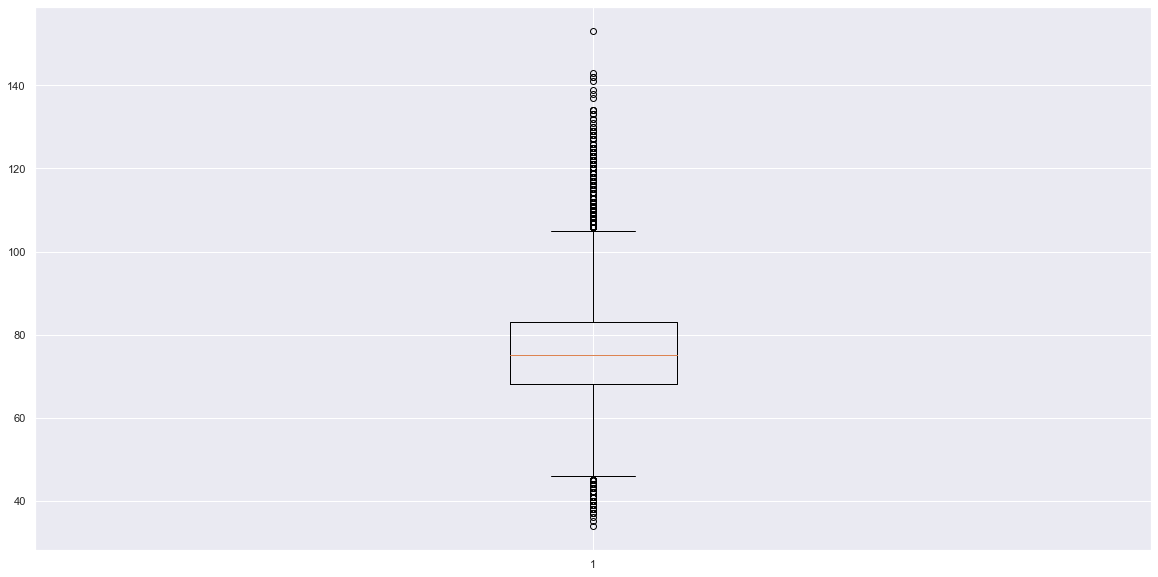

In [72]:
plt.boxplot(regular_season_results.wscore)
plt.show()

# medijan bodova je 75 za pobjednički tim, outlieri su vrijednosti veće od oko 105 i manje od oko 45

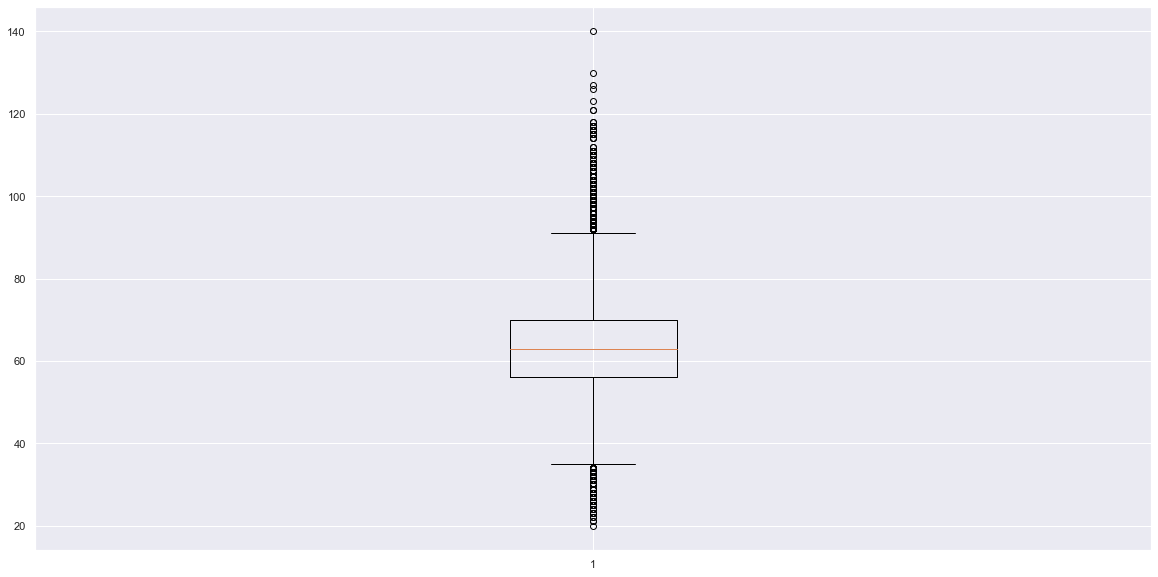

In [73]:
plt.boxplot(regular_season_results.lscore)
plt.show()

# medijan gubitničkog tima je 63 bodova, outlieri su vrijednosti veće od oko 90 i manje od oko 35

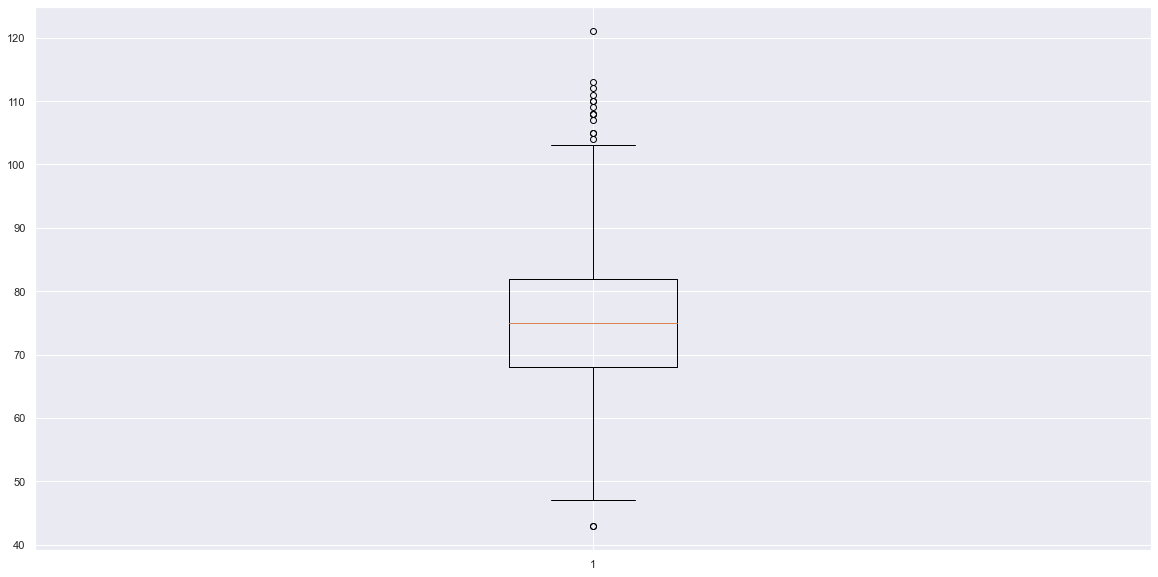

In [74]:
plt.boxplot(tourney_results.wscore)
plt.show()

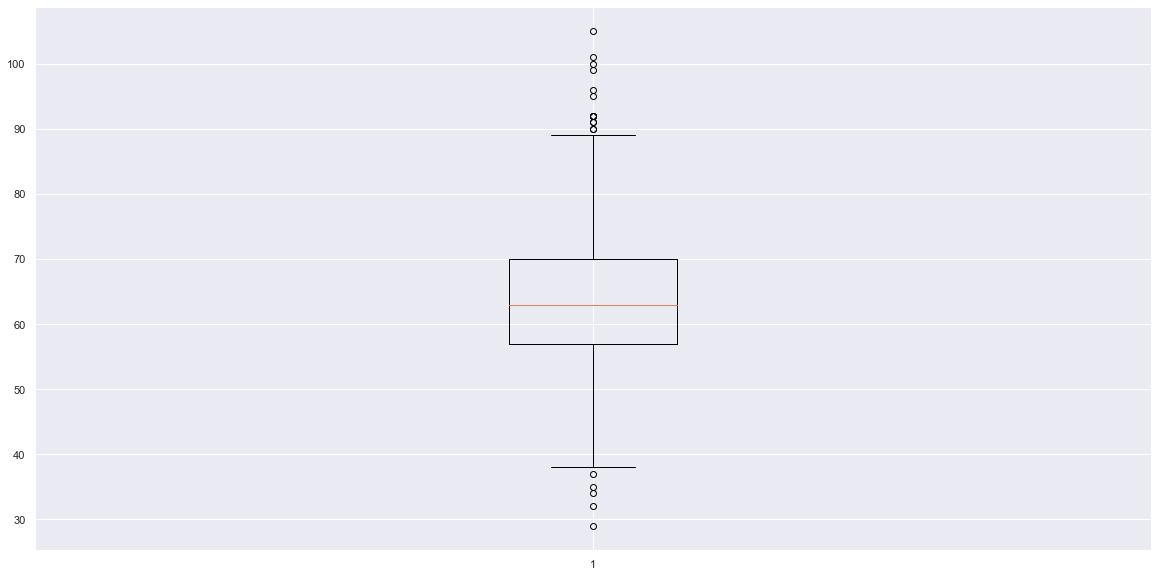

In [75]:
plt.boxplot(tourney_results.lscore)
plt.show()

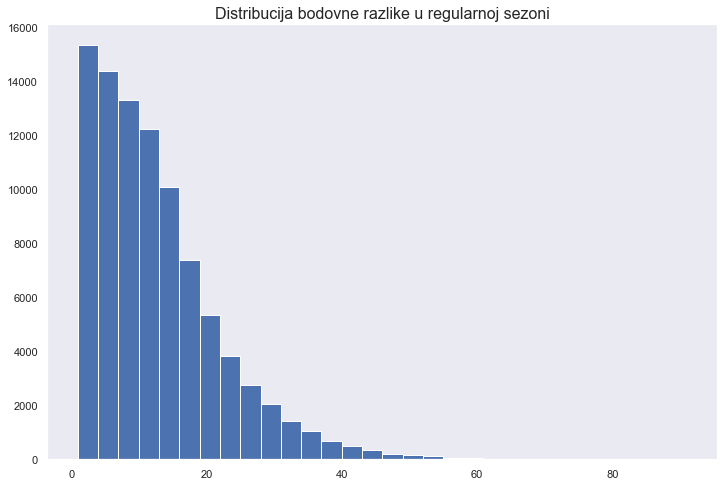

In [76]:
# Bodovna razlika u regularnoj sezoni
regular_season_results['point_diff'] = regular_season_results.wscore - regular_season_results.lscore
regular_season_results.point_diff.hist(bins=30, figsize=(12,8))
plt.grid(False)
plt.title('Distribucija bodovne razlike u regularnoj sezoni', fontsize=16)
plt.show()

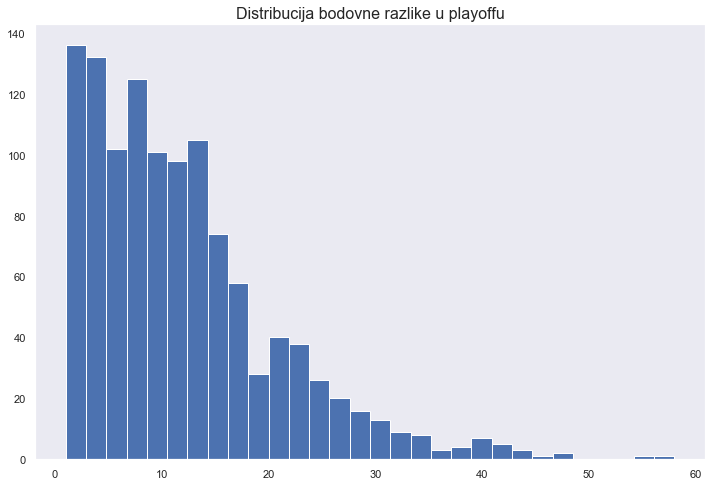

In [77]:
tourney_results['point_diff'] = tourney_results.wscore - tourney_results.lscore
tourney_results.point_diff.hist(bins=30, figsize=(12,8))
plt.grid(False)
plt.title('Distribucija bodovne razlike u playoffu', fontsize=16)
plt.show()

In [78]:
# Min, max, medijan i srednja vrijednost po sezoni
summaries = regular_season_results[['season', 'wscore', 'lscore', 'numot', 'point_diff']].groupby('season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

,wscore_min,wscore_max,wscore_mean,wscore_median,lscore_min,lscore_max,lscore_mean,lscore_median,numot_min,numot_max,numot_mean,numot_median,point_diff_min,point_diff_max,point_diff_mean,point_diff_median
season,,,,,,,,,,,,,,,,
A,41,142,78.198399,77.0,28,127,65.733447,65.0,NaN,NaN,NaN,NaN,1,91,12.464953,10.0
B,42,137,76.321403,76.0,21,111,63.748270,63.0,NaN,NaN,NaN,NaN,1,80,12.573133,10.0
C,38,153,77.229466,76.0,31,121,64.545305,64.0,NaN,NaN,NaN,NaN,1,66,12.684161,11.0
D,43,132,76.200415,75.0,27,123,63.587408,63.0,NaN,NaN,NaN,NaN,1,75,12.613007,10.0
E,37,143,76.351387,76.0,26,126,63.917657,64.0,NaN,NaN,NaN,NaN,1,77,12.433730,10.0
F,35,130,77.187404,77.0,31,116,64.873606,64.0,NaN,NaN,NaN,NaN,1,75,12.313798,10.0
G,40,133,77.019846,77.0,23,130,64.625267,64.0,NaN,NaN,NaN,NaN,1,59,12.394580,10.0
H,42,142,75.789998,75.0,24,140,63.757523,63.0,NaN,NaN,NaN,NaN,1,72,12.032475,10.0
I,37,122,74.973753,75.0,23,114,62.992126,63.0,NaN,NaN,NaN,NaN,1,70,11.981627,10.0


In [79]:
# Min, max, medijan, srednja vrijednost uzmemo li u obzir lokaciju terena
# Primjećujemo da značajka numot nema vrijednosti do sezone J, odnosno ne sadrže podatke o broju prekovremenih perioda utakmice

summaries = regular_season_results[['season', 'wloc','wscore', 'lscore', 'numot', 'point_diff']].groupby(['season', 'wloc']).agg(['min', 'max', 'mean', 'median', 'count'])
summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

wscore_min  wscore_max  wscore_mean  wscore_median  wscore_count  \
season wloc                                                                     
A      A             43         129    76.177556           75.0          1301   
       H             41         142    79.535494           79.0          2437   
       N             48         121    76.563636           75.0           385   
B      A             44         129    74.752498           74.0          1301   
       H             42         137    77.159985           77.0          2669   
       N             47         122    75.429864           75.0           221   
C      A             46         119    75.058475           74.0          1351   
       H             38         153    78.596379           78.0          2651   
       N             45         109    74.433198           73.0           247   
D      A             43         125    74.186556           74.0          1324   
       H             43         132    77.626332           77.0          2628   
       N             45         114    73.385417           73.0           384   
E      A             43         127    74.341304           74.0          1380   
       H             37         143    77.654479           77.0          2735   
       N             43         117    74.501171           74.0           427   
F      A             41         113    75.133577           75.0          1370   
       H             41         130    78.507293           78.0          2811   
       N             35         111    74.900510           75.0           392   
G      A             41         133    75.366379           75.0          1392   
       H             40         120    78.200287           77.0          2786   
       N             44         110    75.076772           74.0           508   
H      A             43         110    74.313627           74.0          1387   
       H             44         142    76.825809           76.0          2813   
       N             42         116    73.723150           73.0           419   
I      A             40         119    73.308458           73.0          1407   
       H             37         122    76.164364           76.0          2750   
       N             38         106    72.730120           73.0           415   
J      A             37         111    72.847262           72.0          1388   
       H             42         123    75.880309           76.0          2849   
       N             38         106    72.783599           72.0           439   
K      A             39         111    73.371724           73.0          1450   
       H             42         129    75.580251           75.0          2866   
       N             44         109    72.133787           72.0           441   
L      A             42         118    72.502376           72.0          1473   
       H             40         129    76.094586           75.0          3066   
       N             46         116    73.934524           73.0           504   
M      A             39         116    73.470927           73.0          1565   
       H             41         129    75.980601           75.0          3093   
       N             44         104    73.348515           73.0           505   
N      A             38         123    72.728760           72.0          1589   
       H             43         122    74.822874           74.0          3139   
       N             43         127    73.259117           73.0           521   
O      A             44         113    72.846729           72.0          1605   
       H             43         134    75.784207           75.0          3128   
       N             46         110    73.441509           73.0           530   
P      A             41         114    73.001877           73.0          1598   
       H             41         121    75.294004           75.0          3102   
       N             36         111    73.16

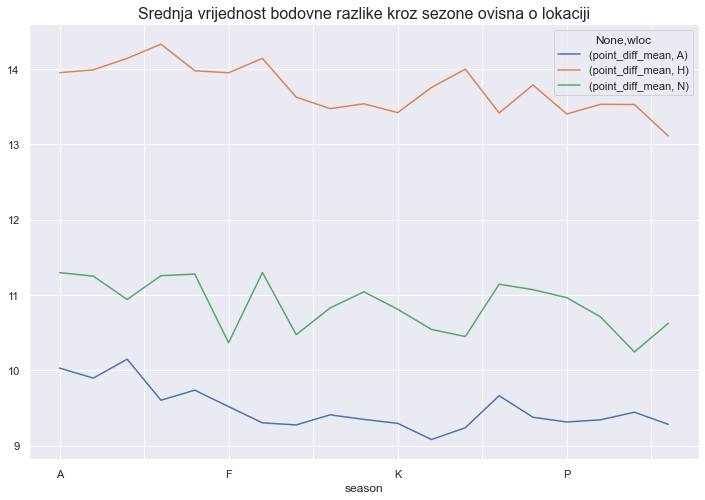

In [80]:
summaries[['point_diff_mean']].unstack().plot(figsize=(12,8))
plt.title('Srednja vrijednost bodovne razlike kroz sezone ovisna o lokaciji', fontsize=16)
plt.show()

In [81]:
# Možemo pogledati pobjednike određene sezone
finals = tourney_results[tourney_results.daynum == 154]

df = pd.merge(finals, teams, left_on='wteam', right_on='id')
df = pd.merge(df, seasons[['season','years']], on='season')
df.sort_values(by=['season'])

,season,daynum,wteam,wscore,lteam,lscore,numot,point_diff,id,name,years
0,A,154,640,76,786,67,NaN,9,640,Kentucky,1995-1996
3,B,154,511,84,640,79,NaN,5,511,Arizona,1996-1997
1,C,154,640,78,821,69,NaN,9,640,Kentucky,1997-1998
4,D,154,559,77,577,74,NaN,3,559,Connecticut,1998-1999
7,E,154,671,89,592,76,NaN,13,671,Michigan St,1999-2000
8,F,154,577,82,511,72,NaN,10,577,Duke,2000-2001
10,G,154,662,64,625,52,NaN,12,662,Maryland,2001-2002
11,H,154,786,81,636,78,NaN,3,786,Syracuse,2002-2003
5,I,154,559,82,606,73,NaN,9,559,Connecticut,2003-2004
12,J,154,708,75,623,70,0.0,5,708,North Carolina,2004-2005


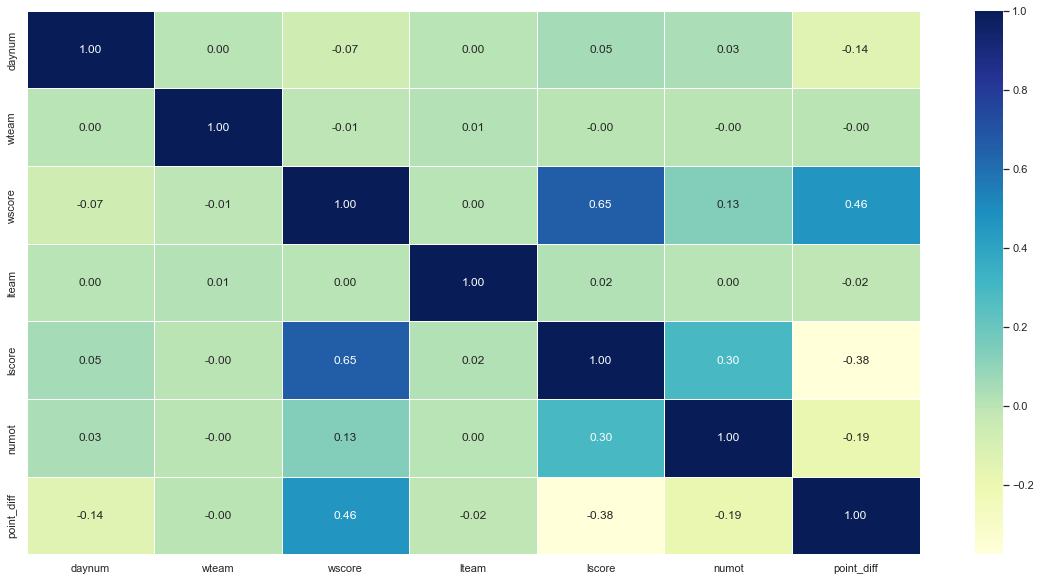

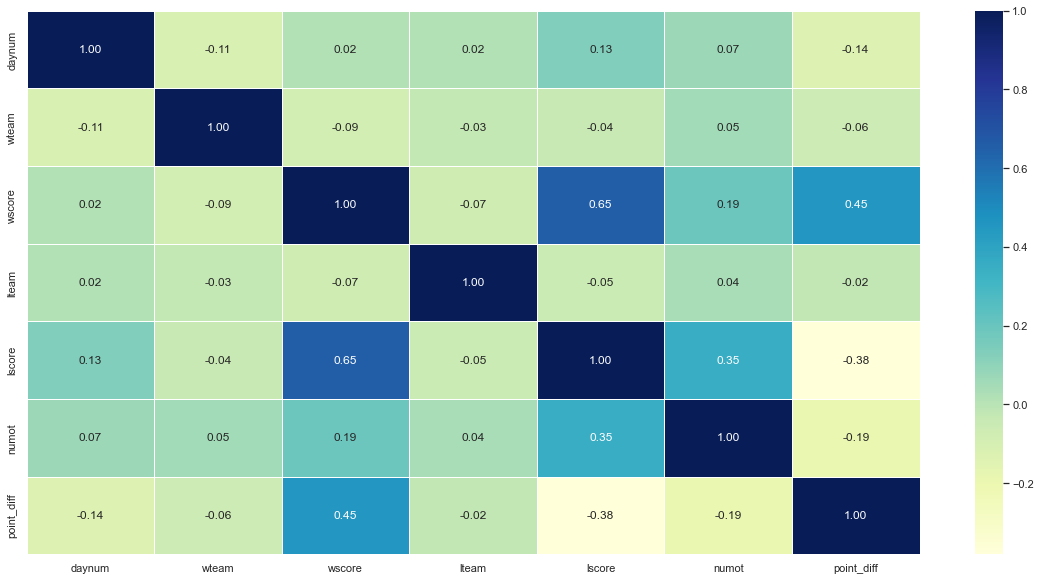

In [82]:
# Ovisnosti određene značajke o drugima

# Regularna sezona
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(regular_season_results.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

# Playoff
sns.heatmap(tourney_results.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()
